In [1]:

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator


from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.utils import plot_model


from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn


import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   

In [3]:
#pokemon_names = ["Abra", "Aerodactyl", "Alakazam", "Arbok", "Arcanine", "Articuno", "Beedrill", "Bellsprout", "Blastoise", "Bulbasaur", "Butterfree", "Caterpie", "Chansey", "Charizard", "Charmander", "Charmeleon", "Clefable", "Clefairy", "Cloyster", "Cubone", "Dewgong", "Diglett", "Ditto", "Dodrio", "Doduo", "Dragonair", "Dragonite", "Dratini", "Drowzee", "Dugtrio", "Eevee", "Ekans", "Electabuzz", "Electrode", "Exeggcute", "Exeggutor", "Farfetchd", "Fearow", "Flareon", "Gastly", "Gengar", "Geodude", "Gloom", "Golbat", "Goldeen", "Golduck", "Golem", "Graveler", "Grimer", "Growlithe", "Gyarados", "Haunter", "Hitmonchan", "Hitmonlee", "Horsea", "Hypno", "Ivysaur", "Jigglypuff", "Jolteon", "Jynx", "Kabuto", "Kabutops", "Kadabra", "Kakuna", "Kangaskhan", "Kingler", "Koffing", "Krabby", "Lapras", "Lickitung", "Machamp", "Machoke", "Machop", "Magikarp", "Magmar", "Magnemite", "Magneton", "Mankey", "Marowak", "Meowth", "Metapod", "Mew", "Mewtwo", "Moltres", "Mr.Mime", "Muk", "Nidoking", "Nidoqueen", "Nidoran-f", "Nidoran-m", "Nidorina", "Nidorino", "Ninetales", "Oddish", "Omanyte", "Omastar", "Onix", "Paras", "Parasect", "Persian", "Pidgeot", "Pidgeotto", "Pidgey", "Pikachu", "Pinsir", "Poliwag", "Poliwhirl", "Poliwrath", "Ponyta", "Porygon", "Primeape", "Psyduck", "Raichu", "Rapidash", "Raticate", "Rattata", "Rhydon", "Rhyhorn", "Sandshrew", "Sandslash", "Scyther", "Seadra", "Seaking", "Seel", "Shellder", "Slowbro", "Slowpoke", "Snorlax", "Spearow", "Squirtle", "Starmie", "Staryu", "Tangela", "Tauros", "Tentacool", "Tentacruel", "Vaporeon", "Venomoth", "Venonat", "Venusaur", "Victreebel", "Vileplume", "Voltorb", "Vulpix", "Wartortle", "Weedle", "Weepinbell", "Weezing", "Wigglytuff", "Zapdos", "Zubat"]

pokemon_names = ["Pikachu","Bulbasaur", "Ivysaur", "Venusaur", "Charmander", "Charmeleon", "Charizard", "Squirtle", "Wartortle", "Blastoise", "Articuno", "Zapdos", "Moltres", "Mew", "Mewtwo"]

In [4]:
#listas vacías para la matriz de imágenes y sus etiquetas
X = []
Z = []
img_size = 224

In [5]:
#funcion para generar un dataset de imagenes usable a partir de un directorio con directorios de imagenes
def make_train_data(poke_name, DIR):
  for img in tqdm(os.listdir(DIR)):
    label = poke_name
    path = os.path.join(DIR, img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (img_size, img_size))
    X.append(np.array(img))
    Z.append(str(label))

In [6]:
i = 1
#para cada pokemon en la lista se hace llamado a la funcion
for pokemon in pokemon_names:
  dir = './PokemonData/' + pokemon
  make_train_data(pokemon, dir)
  print(i , ' :' , len(X))
  i = i + 1

100%|██████████| 103/103 [00:02<00:00, 34.40it/s]


1  : 103


100%|██████████| 50/50 [00:01<00:00, 38.71it/s]


2  : 153


100%|██████████| 88/88 [00:01<00:00, 47.03it/s]


3  : 241


100%|██████████| 52/52 [00:01<00:00, 42.82it/s]


4  : 293


100%|██████████| 111/111 [00:02<00:00, 49.26it/s]


5  : 404


100%|██████████| 44/44 [00:00<00:00, 93.75it/s]


6  : 448


100%|██████████| 88/88 [00:01<00:00, 67.53it/s]


7  : 536


100%|██████████| 59/59 [00:00<00:00, 70.42it/s]


8  : 595


100%|██████████| 85/85 [00:00<00:00, 97.77it/s] 


9  : 680


100%|██████████| 57/57 [00:00<00:00, 67.89it/s]


10  : 737


100%|██████████| 79/79 [00:01<00:00, 63.67it/s]


11  : 816


100%|██████████| 86/86 [00:00<00:00, 91.62it/s]


12  : 902


100%|██████████| 82/82 [00:00<00:00, 83.38it/s]


13  : 984


100%|██████████| 71/71 [00:00<00:00, 72.80it/s]


14  : 1055


100%|██████████| 99/99 [00:01<00:00, 84.87it/s]

15  : 1154


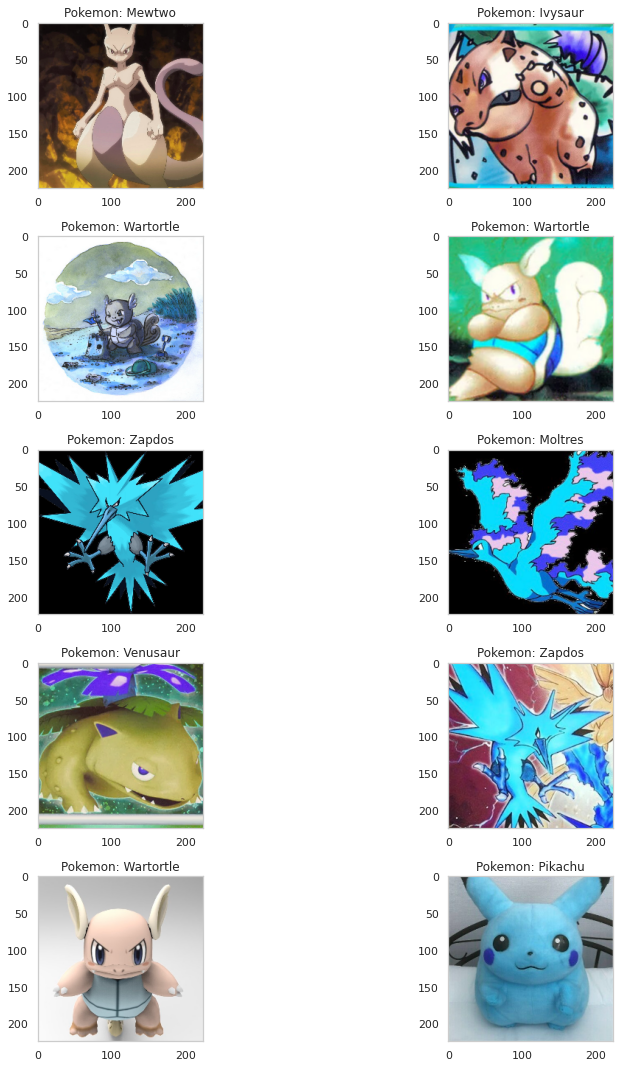

In [7]:
#demostracion grafica del dataset
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Pokemon: '+Z[l])
        ax[i,j].grid(None)
plt.tight_layout()

In [8]:
#label encoding para las etiquetas
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,15)
#transformacion de los valores de las imagenes a escala 0 - 1
X=np.array(X)
X=X/255

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42) #split del dataset en train y test

In [10]:
#tamaño de los batches y epocas a emplear
batch_size=100
epochs=50

In [11]:
K.clear_session()
#Modelo de red neuronal convolutiva, con una capa mas respecto a la del archivo CNN_I

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(15, activation = "softmax"))

In [12]:
#Funcion para reducir el learning rate en caso de que un parametro (accuracy de la validacion) no tenga un mejoramiento significativo entre epocas
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [13]:
#Data augmentation para evitar tanto overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False)
datagen.fit(x_train)

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

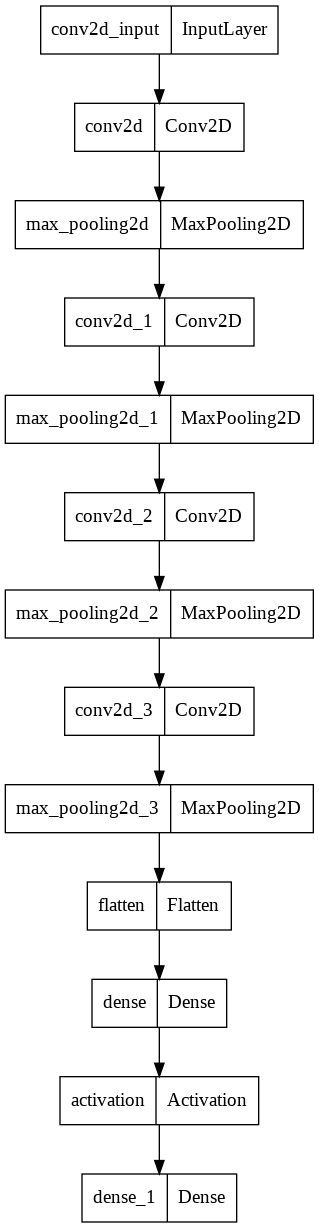

In [16]:
plot_model(model, "model_II.png")

In [17]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_test,y_test), verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
9/9 [==============================] - 99s 11s/step - loss: 2.5684 - accuracy: 0.1456 - val_loss: 2.1147 - val_accuracy: 0.2944
Epoch 2/50
9/9 [==============================] - 85s 9s/step - loss: 2.0156 - accuracy: 0.3038 - val_loss: 1.7861 - val_accuracy: 0.3983
Epoch 3/50
9/9 [==============================] - 85s 9s/step - loss: 1.6421 - accuracy: 0.4253 - val_loss: 1.4550 - val_accuracy: 0.5065
Epoch 4/50
9/9 [==============================] - 87s 9s/step - loss: 1.4528 - accuracy: 0.4775 - val_loss: 1.1181 - val_accuracy: 0.6494
Epoch 5/50
9/9 [==============================] - 98s 11s/step - loss: 1.1942 - accuracy: 0.5789 - val_loss: 1.1301 - val_accuracy: 0.6017
Epoch 6/50
9/9 [==============================] - 85s 9s/step - loss: 1.1785 - accuracy: 0.5844 - val_loss: 1.0175 - val_accuracy: 0.6623
Epoch 7/50
9/9 [==============================] - 83s 9s/step - loss: 1.1168 - accuracy: 0.5966 - val_loss: 0.9672 - val_accuracy: 0.6883
Epoch 8/50
9/9 [================

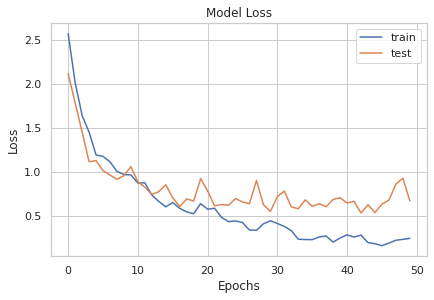

In [18]:
#Graficacion del Loss del modelo
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

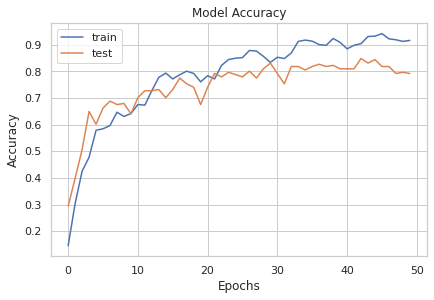

In [19]:
#Graficacion del Accuracy del modelo
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [20]:
#Accuracy y Loss del modelo
score_model1 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss Model 2:', score_model1[0])
print('Test accuracy Model 2:', score_model1[1])

Test loss Model 2: 0.6754796504974365
Test accuracy Model 2: 0.7922077775001526


8/8 [==============================] - 6s 704ms/step


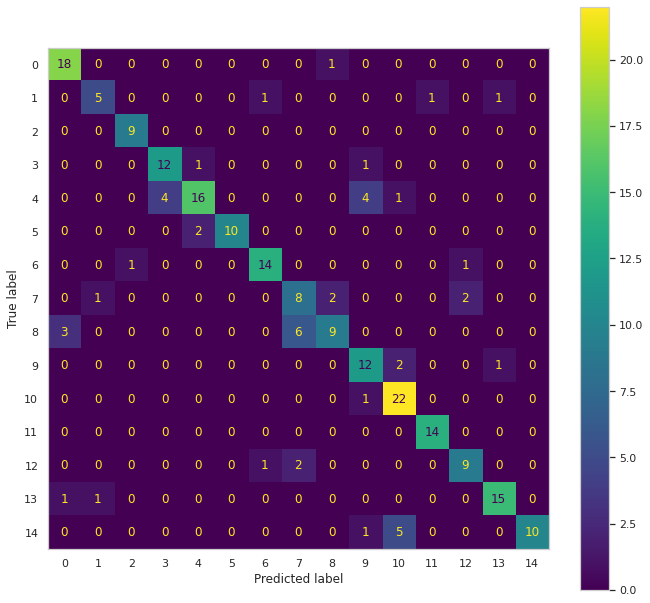

In [21]:
#matriz de confusion
fig, ax = plt.subplots(figsize=(10, 10))
plt.grid(None)
matrix = confusion_matrix(y_test.argmax(axis = 1), model.predict(x_test).argmax(axis=1))
ConfusionMatrixDisplay(matrix).plot(ax = ax)

In [22]:
X = []
Z = []
i = 1
for pokemon in pokemon_names:
  dir = './test/' + pokemon
  make_train_data(pokemon, dir)
  print(i , ' :' , len(X))
  i = i + 1

100%|██████████| 1/1 [00:00<00:00, 27.73it/s]


1  : 1


100%|██████████| 1/1 [00:00<00:00, 52.01it/s]


2  : 2


100%|██████████| 1/1 [00:00<00:00, 68.00it/s]


3  : 3


100%|██████████| 1/1 [00:00<00:00, 94.58it/s]


4  : 4


100%|██████████| 1/1 [00:00<00:00, 56.77it/s]


5  : 5


100%|██████████| 1/1 [00:00<00:00, 72.84it/s]


6  : 6


100%|██████████| 1/1 [00:00<00:00, 38.38it/s]


7  : 7


100%|██████████| 1/1 [00:00<00:00, 57.59it/s]


8  : 8


100%|██████████| 1/1 [00:00<00:00, 38.73it/s]


9  : 9


100%|██████████| 1/1 [00:00<00:00, 35.75it/s]


10  : 10


100%|██████████| 1/1 [00:00<00:00, 56.85it/s]


11  : 11


100%|██████████| 1/1 [00:00<00:00, 71.86it/s]


12  : 12


100%|██████████| 1/1 [00:00<00:00, 67.11it/s]


13  : 13


100%|██████████| 1/1 [00:00<00:00, 38.89it/s]


14  : 14


100%|██████████| 1/1 [00:00<00:00, 78.57it/s]

15  : 15


In [23]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,15)
X=np.array(X)
X=X/255

In [24]:
pred=model.predict(X)
pred_digits=np.argmax(pred,axis=1)
pred_digits

1/1 [==============================] - 1s 622ms/step


array([10,  2,  6, 12,  4,  5,  3, 11, 13,  1,  0, 14, 13,  7,  7])

In [25]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(Y)):
    if(np.argmax(Y[i])==pred_digits[i]):
        prop_class.append(i)

i=0
for i in range(len(Y)):
    if(not np.argmax(Y[i])==pred_digits[i]):
        mis_class.append(i)

print(prop_class)
print(mis_class)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]
[12, 14]


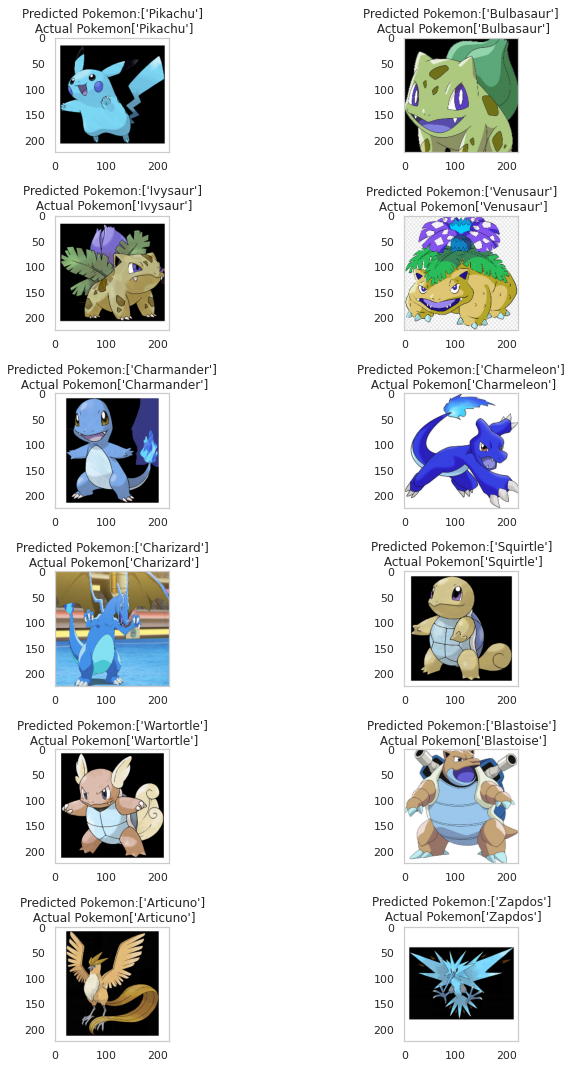

In [26]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(int(len(prop_class) / 2),2)
fig.set_size_inches(15,15)
for i in range (int(len(prop_class) / 2)):
    for j in range (2):
        ax[i,j].imshow(X[prop_class[count]])
        ax[i,j].set_title("Predicted Pokemon:" + str(le.inverse_transform([pred_digits[prop_class[count]]])) + "\n Actual Pokemon" + str(le.inverse_transform([np.argmax([Y[prop_class[count]]])])))
        ax[i,j].grid(None)
        plt.tight_layout()
        count+=1

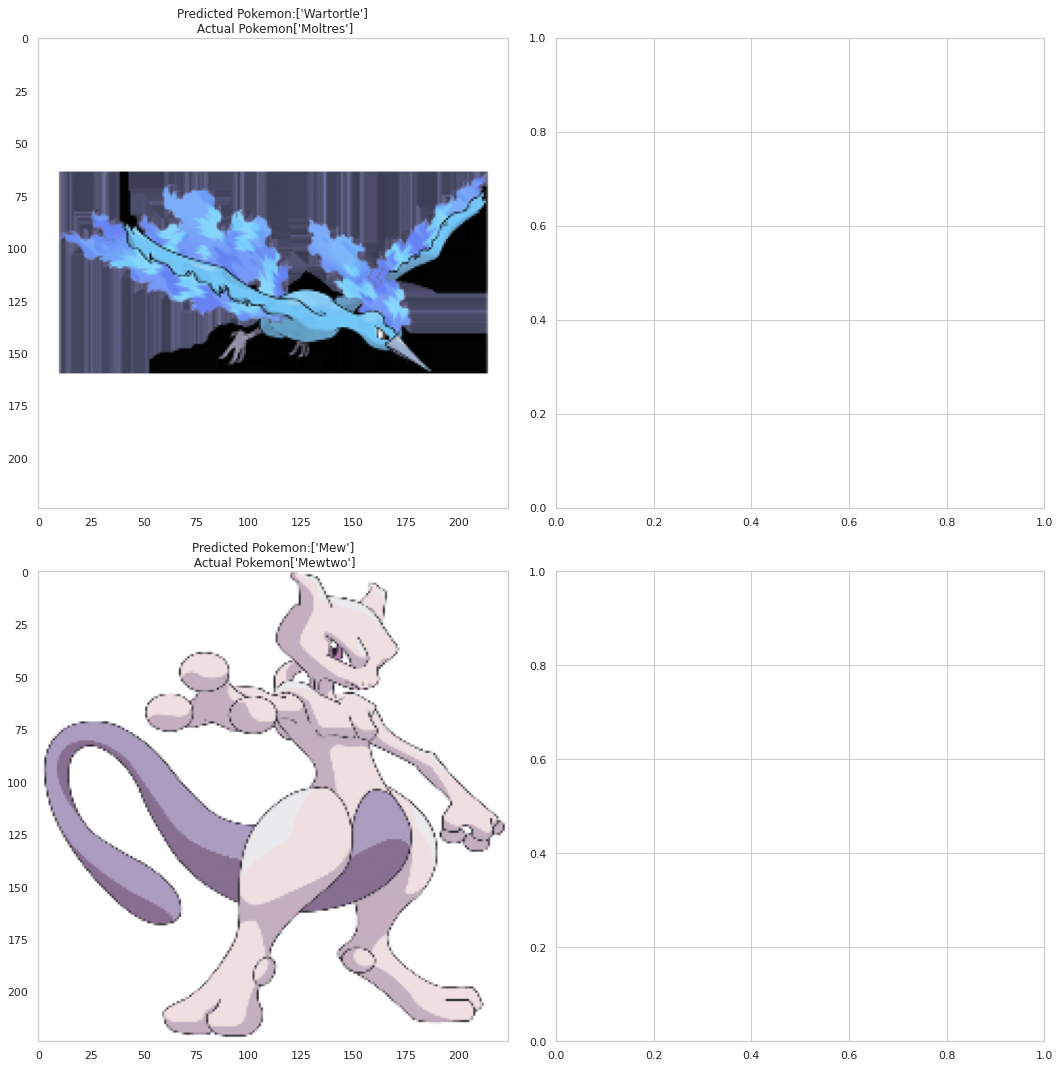

In [29]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(len(mis_class), 2)
fig.set_size_inches(15,15)
for i in range (len(mis_class)):
      ax[i,0].imshow(X[mis_class[count]])
      ax[i,0].set_title("Predicted Pokemon:" + str(le.inverse_transform([pred_digits[mis_class[count]]])) + "\n Actual Pokemon" + str(le.inverse_transform([np.argmax([Y[mis_class[count]]])])))
      ax[i,0].grid(None)
      plt.grid(None)
      plt.tight_layout()
      count+=1